In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import time

print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("GPU ", "사용 가능" if tf.config.experimental.list_physical_devices("GPU") else "사용 불가능")



버전:  2.2.0
즉시 실행 모드:  True
GPU  사용 불가능


In [3]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

print('locad extra module ok')


locad extra module ok


In [4]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1
# Patch the location of gfile
tf.gfile = tf.io.gfile

print('load tf com v1 ok')

load tf com v1 ok


In [5]:
model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
model_dir = f"./data/{model_name}/saved_model"
model = tf.saved_model.load(str(model_dir))
model = model.signatures['serving_default']
print(f'{model_name} load ok')

category_index = label_map_util.create_category_index_from_labelmap('./data/mscoco_label_map.pbtxt', use_display_name=True)
print('lable load ok')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
ssd_mobilenet_v1_coco_2017_11_17 load ok
lable load ok


In [6]:
image_np = np.array(Image.open('../../res/shally.jpg'))
print('load image and convert np format')
print(image_np.shape)



load image and convert np format
(720, 1281, 3)


In [7]:
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis,...]
print('convert tensor')

convert tensor


In [8]:
output_dict = model(input_tensor)
print([key for key in output_dict])

['detection_scores', 'detection_classes', 'num_detections', 'detection_boxes']


In [9]:
num_detections = int(output_dict.pop('num_detections'))

In [10]:
print([key for key in output_dict])

['detection_scores', 'detection_classes', 'detection_boxes']


In [11]:
output_dict = {key:value[0, :num_detections].numpy() for key,value in output_dict.items()}
output_dict['num_detections'] = num_detections
# detection_classes should be ints.
output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

print([key for key in output_dict])

['detection_scores', 'detection_classes', 'detection_boxes', 'num_detections']


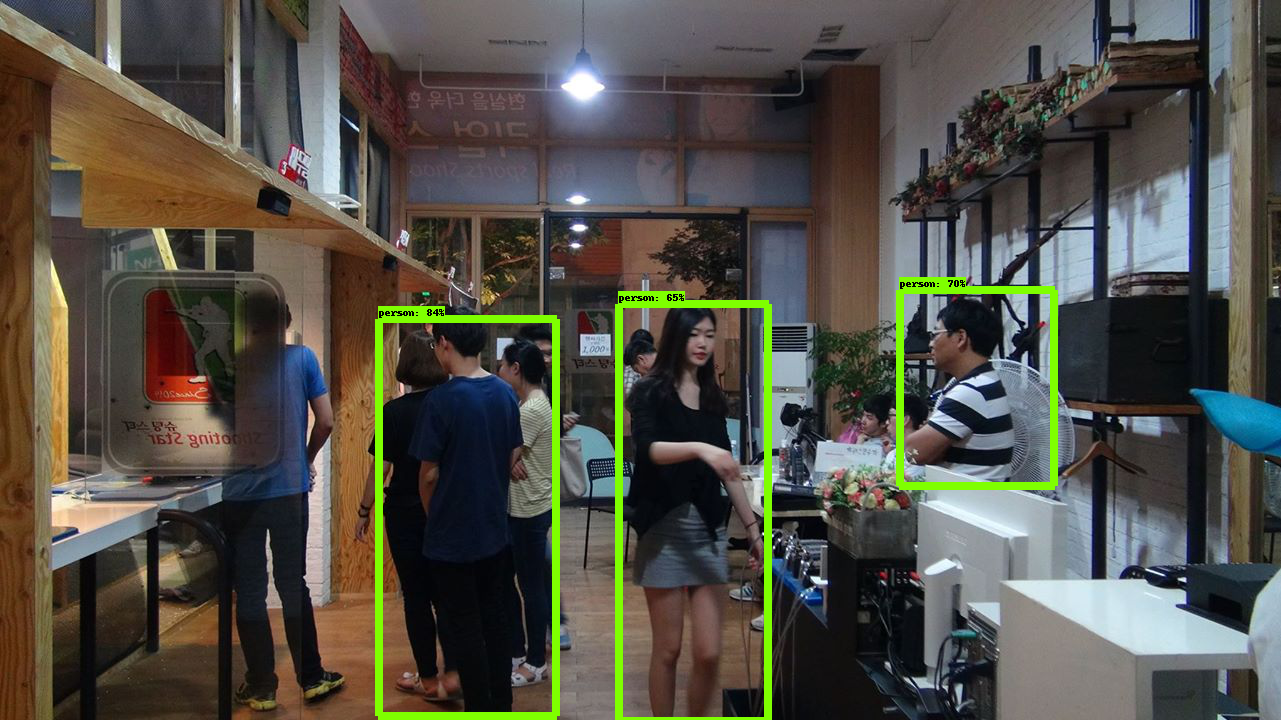

In [12]:
_img_temp = image_np.copy()
vis_util.visualize_boxes_and_labels_on_image_array(
      _img_temp,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

display(Image.fromarray(_img_temp))

In [14]:
print([key for key in output_dict])

['detection_scores', 'detection_classes', 'detection_boxes', 'num_detections']


In [16]:
print([_val for _val in output_dict['detection_scores'] if _val > 0.5 ])

[0.84395766, 0.70205116, 0.6533833]
